_Paige Champken<br>
Year 3 Computing Project<br>
Random Walks: Diffusion Limited Aggregation<br>
29/1/2020_

# Part 3: Diffusion Limited Aggregation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
#This function checks if a walker is going to stick to a previous seed.

def does_seed_stick(seedlist, pos, stick=False):      #inputs: list of locations of previous seeds and current position of walker
    for seed in seedlist:                             #looping through every seed
        if seed[0]==pos[0] and seed[1]==(pos[1]+1):   #check if the walker is adjacent to that seed either above, below, to the left, or to the right
            stick=True
        if seed[0]==pos[0] and seed[1]==(pos[1]-1):
            stick=True
        if seed[1]==pos[1] and seed[0]==(pos[0]+1):
            stick=True  
        if seed[1]==pos[1] and seed[0]==(pos[0]-1):
            stick=True
    return stick                                     

#function will return True if the walker should stick and False otherwise.

In [3]:
#This function checks whether the walker has gone outside a chosen boundary.
#The walker can stray up to 5 units from the perimeter of generation. 
#After this it will be discounted and regenerated at the boundary.

def is_seed_in_boundary(pos, squaresize, within_boundary=False):        #inputs: position and perimeter size
    if pos[0]<(squaresize/2)+5 and pos[0]>(-squaresize/2)-5 and pos[1]<(squaresize/2)+5 and pos[1]>(-squaresize/2)-5:
        within_boundary=True
    return within_boundary

#function returns True if the walker is within 5 units of the perimeter in any direction and False otherwise.

In [4]:
#This function generates a random point on a square shaped perimeter.
#Edge length of perimeter must be even as the walker takes steps in only integer units
#and the first seed is at (0,0).

def point_on_perim(edgelength):           #input: edge length of the perimeter
    if edgelength % 2 != 0:        
        return print('Please input even edge length')   
    else:
        edge=np.random.randint(1,5)       #randomly choose an edge by assigning each edge a number - top:1, right:2, bottom:3, left:4
        if edge==1:                       #once an edge is chosen, choose random point on that line for second coordinate
            x=np.random.randint(-edgelength/2, (edgelength/2)+1)
            y=edgelength/2
        if edge==2:
            x=edgelength/2
            y=np.random.randint(-edgelength/2, (edgelength/2)+1)
        if edge==3:
            x=np.random.randint(-edgelength/2, (edgelength/2)+1)
            y=-edgelength/2
        if edge==4:
            x=-edgelength/2
            y=np.random.randint(-edgelength/2, (edgelength/2)+1)
    pos=[x, y]
    return pos     

#function returns edge position.

In [5]:
#This function makes the walker take a step.

def take_a_step(pos):                #input: an initial position
    step_dir=np.random.randint(1,5)  #randomly choose a direction by assigning each direction a number - up:1, right:2, down:3, left:4
    if step_dir==1:                  #alter x and y coordinate of position depending on step direction
        new_x=pos[0]
        new_y=pos[1]+1
    if step_dir==2:
        new_x=pos[0]+1
        new_y=pos[1]
    if step_dir==3:
        new_x=pos[0]
        new_y=pos[1]-1
    if step_dir==4:
        new_x=pos[0]-1
        new_y=pos[1]
    newpos=[new_x, new_y]
    return newpos

#funciton returns new position.

In [6]:
#This function produces the seed data for the diffusion limited aggregate.

def myDLAdata(m, squaresize):               #inputs: number of walkers and size of perimeter
    mwalks=np.linspace(1, m, m)             #create generic array with the same number of elements as walkers
    seeds = np.zeros((m+1, 2))              #create empty seed list of coordinates, with the same number of points as walkers
    seeds[0,:]=[0,0]                        #create first seed at (0,0)
    for i, walk in enumerate(mwalks):                         #looping through every walker:
        pos=point_on_perim(squaresize)                        #generate a random point on perimeter
        while does_seed_stick(seeds, pos)==False:             #check if the walker sticks to previous seed
            if is_seed_in_boundary(pos, squaresize)==True:      #if walker is not stuck, check that it's within boundary
                newpos=take_a_step(pos)                           #if walker is within boundary, take a step, loop back to check if it's stuck
                pos=newpos                                
            else:                                             
                pos=point_on_perim(squaresize)                  #if walker exits the boundary, generate a new point, loop back to check if it's stuck
        else:                                            
            seeds[i+1,:]=pos                                  #if walker is stuck, add it's position to seed list and begin next walk
    return seeds

#function returns list of the location of every seed.

In [7]:
#Now to generate an image of a DLA. Produce some data with chosen perimeter size and number of walkers.

DLA=myDLAdata(400,80)

#The 400 walker DLA within a square with an edgelength of 80 is the largest that runs for me in a sensible amount of time.  

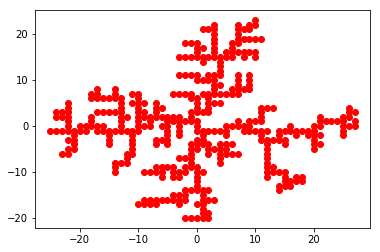

In [8]:
#Isolate the x and y coordinates of each point to plot an image.

DLA_xcoords=[data[0] for data in DLA]
DLA_ycoords=[data[1] for data in DLA]

plt.plot(DLA_xcoords, DLA_ycoords, 'r o')

In [9]:
#To find fractal dimension, first the radius of the DLA must be found to find the volume containing the fractal.
#This function finds the distance to the seed furthest from the origin. 

def max_DLA_distance(DLAdata):   #input: seed locations
    distances=[]                 #create empty list of distances
    for point in DLAdata:        #loop through every seed 
        D=np.sqrt(point[0]**2 + point[1]**2)  #find the distance from the seed to the origin with pythagoras 
        distances.append(D)                   #add to list of distances
    max_distance=np.amax(distances)           #function returns highest value in this list.
    return max_distance

In [13]:
#Fractal dimension=log(N)/log(R), this function uses this to output the fractal dimension.

def fractal_dimension(DLAdata):
    R=max_DLA_distance(DLAdata)
    N=len(DLAdata)
    fd=np.log(N)/np.log(R)
    return fd

print(fractal_dimension(DLA))

1.8152672362167448
